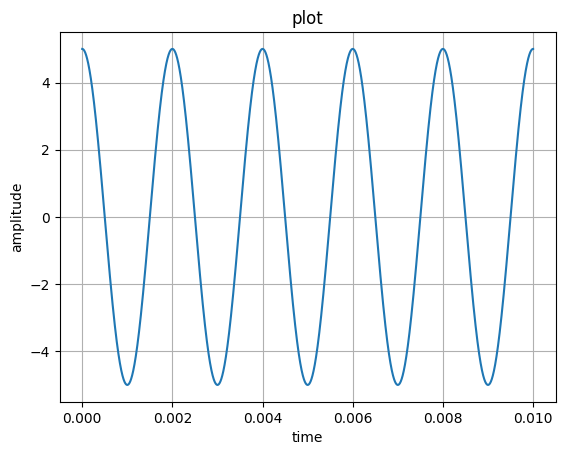

In [15]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 0.01, 10000)

y = 5 * np.sin(2 * np.pi * 500 * t + np.deg2rad(90))

plt.plot(t, y)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("plot")
plt.grid(True)
plt.show()


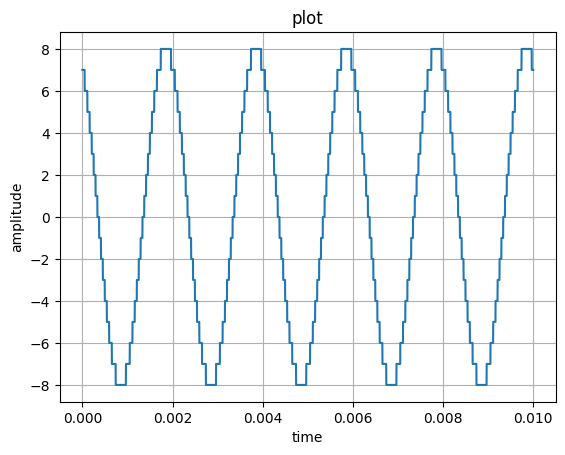

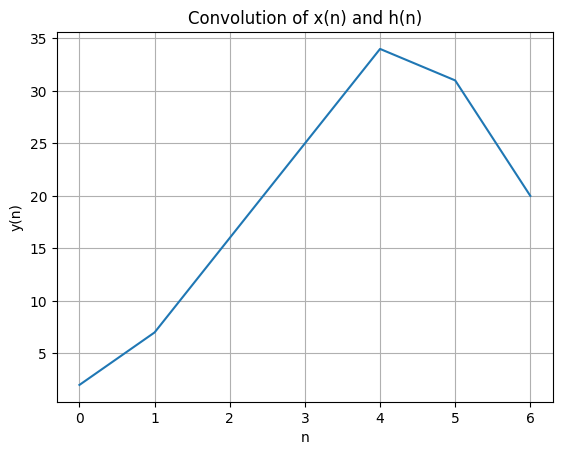

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define x(n) and h(n)
x = np.array([1, 2, 3, 4, 5])
h = np.array([2, 3, 4])

# Calculate y(n) using convolution
y = np.convolve(x, h)

# Generate the range of n values
n = np.arange(len(y))

# Plot y(n)
plt.plot(n, y)
plt.xlabel('n')
plt.ylabel('y(n)')
plt.title('Convolution of x(n) and h(n)')
plt.grid(True)
plt.show()

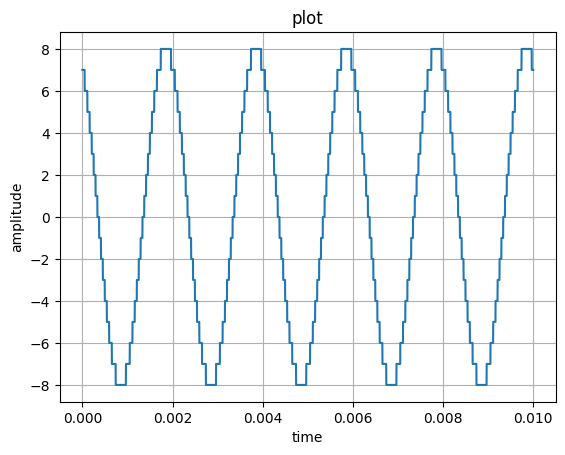

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

t = np.linspace(0, 0.01, 10000)

y = (5 * np.sin(2 * np.pi * 500 * t + 90))

y_quantized = (8/5*y)

y_quantized = np.round(y_quantized)

plt.plot(t, y_quantized)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("plot")
plt.grid(True)
plt.show()


# DFT for book example

[-5.55111512e-17+0.00000000e+00j  5.55111512e-17-4.00000000e+00j
  1.41421356e+00+1.41421356e+00j -3.33066907e-16-7.21644966e-16j
  4.99600361e-16-1.43476297e-16j  1.72084569e-15+9.43689571e-16j
  1.41421356e+00-1.41421356e+00j -2.38697950e-15+4.00000000e+00j]


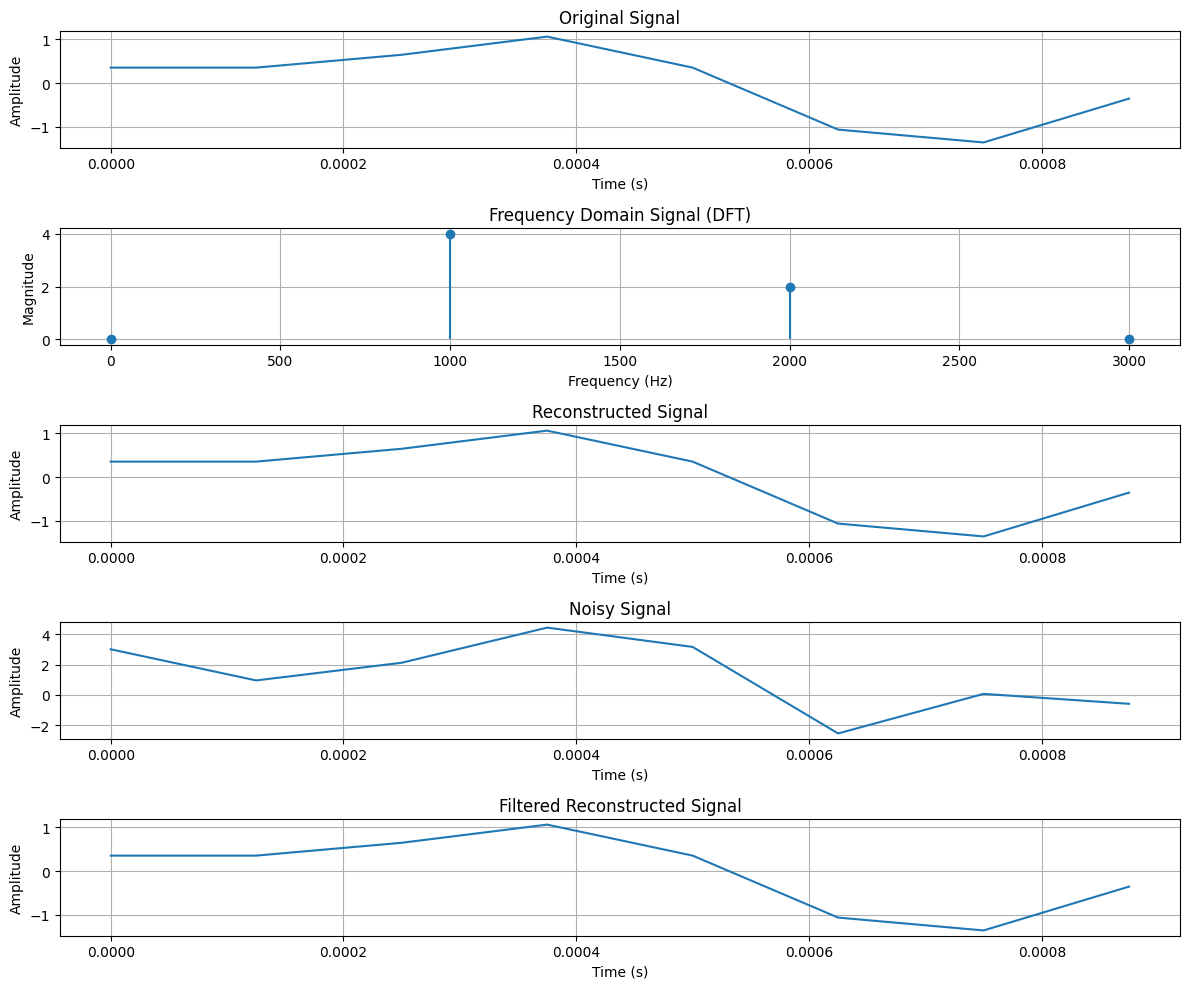

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
total_plots = 5

sampling_rate = 8000
N = 8
t = np.arange(N) / sampling_rate

x_t = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t + 3 * np.pi / 4)

plt.subplot(total_plots, 1, 1)
plt.plot(t, x_t)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

X_f = dft(x_t)

print(X_f)

N = len(X_f)
frequencies = np.fft.fftfreq(N, 1 / sampling_rate)

plt.subplot(total_plots, 1, 2)
plt.stem(frequencies[:N // 2], np.abs(X_f[:N // 2]), basefmt=" ")
plt.title('Frequency Domain Signal (DFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)


def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N)
    return x / N

x_t_reconstructed = idft(X_f)

plt.subplot(total_plots, 1, 3)
plt.plot(t, x_t_reconstructed.real)
plt.title('Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


np.random.seed(0)
noise = 1.5 * np.random.randn(len(x_t))
noisy_signal = x_t + noise

plt.subplot(total_plots, 1, 4)
plt.plot(t, noisy_signal)
plt.title('Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)


cutoff_freq = 100
H = np.zeros_like(X_f)
H[:cutoff_freq] = 1
H[-cutoff_freq:] = 1
filtered_signal = x_t_reconstructed * H

plt.subplot(total_plots, 1, 5)
plt.plot(t, filtered_signal.real)
plt.title('Filtered Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()
